In [1]:
import pandas as pd
import numpy as np

Getting DataSet from Cloud Object Storage

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_252fb149ac854967a383d909584421f8 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='5fHfR8gNPvnMM6RTKWwCChTzCD13d2KXt9ZLKOzitMZr',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_252fb149ac854967a383d909584421f8.get_object(Bucket='lifeexpectancy2-donotdelete-pr-akjpyh8ahgdg3z',Key='Life_Expectancy1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset1 = pd.read_csv(body)
dataset1.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# EDA

To do Exploratory Data Analysis I've used this library. We can do EDA by this in very short time.

This code will us to generate Data Analysis report file.

## Feature Selection

This is the correlation matrix, with the help of which we can select the best features which will help us to predict the life expectancy.

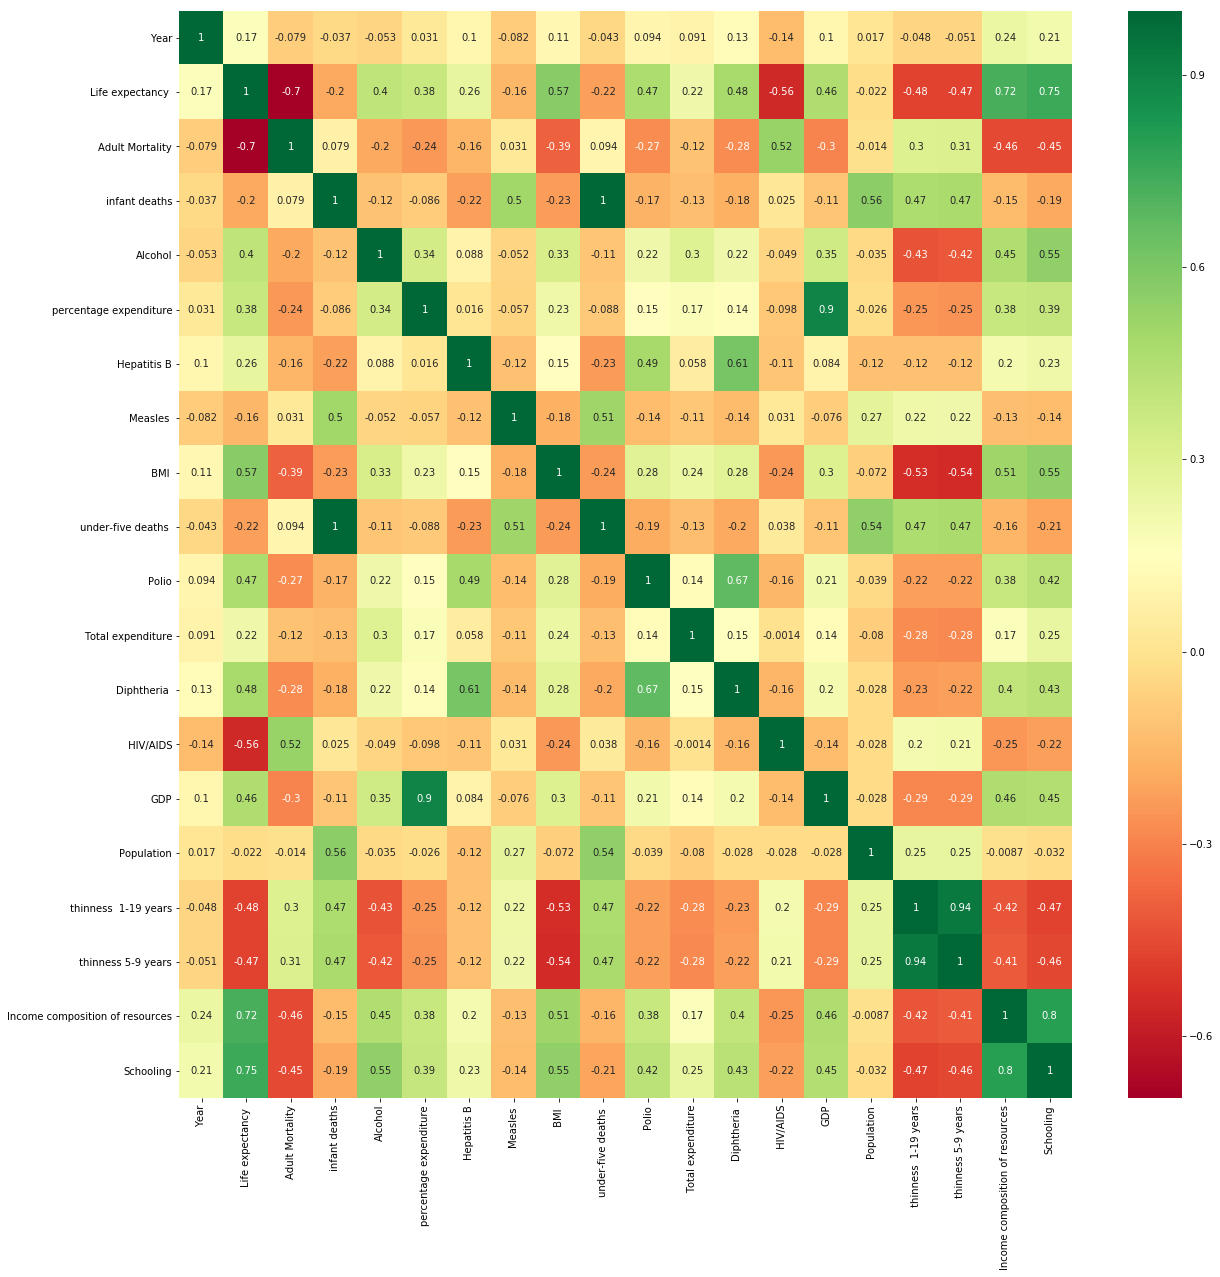

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = dataset1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

From above correlation matrix, we can eliminate one column from Hepatitis B and Diphtheria, one from Total Expenditure and Percentage expenditure, one from thinness 1-19 years and thinness 5-19 years, Population. 

I have drop Hepatitis B, Diphtheria, Total Expenditure, thinness 5-9 years and Population columns.

In [5]:
dataset1.drop(['Hepatitis B','Total expenditure',' thinness 5-9 years','Population'],axis=1,inplace=True)

## Handling missing values

for this project I have handle missing values by actual data from the different places.

GDP:-https://www.worldometers.info/gdp/gdp-per-capita/
BMI:-https://ourworldindata.org/obesity
HDI and Schooling:-http://hdr.undp.org/en/countries
Alcohols:-https://ourworldindata.org/alcohol-consumption
Thinness:-https://apps.who.int/gho/data/view.main.NCDBMIMINUS205-19Cv

we can also fill this missing values by the following code for each column. 

In [6]:
dataset1.to_csv('Life_Expectancy.csv')

### Loading new dataset after handling missing values.

In [6]:
body = client_252fb149ac854967a383d909584421f8.get_object(Bucket='lifeexpectancy2-donotdelete-pr-akjpyh8ahgdg3z',Key='Life_Expectancy.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)

In [7]:
dataset.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,1154,19.1,83,6,65,0.1,584.259210,17.2,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,492,18.6,86,58,62,0.1,612.696514,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,430,18.1,89,62,64,0.1,631.744976,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,2787,17.6,93,67,67,0.1,669.959000,17.9,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,3013,17.2,97,68,68,0.1,63.537231,18.2,0.454,9.5


In [8]:
print(dataset.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Measles',
       ' BMI ', 'under-five deaths ', 'Polio', 'Diphtheria', ' HIV/AIDS',
       'GDP', ' thinness  1-19 years', 'Income composition of resources',
       'Schooling'],
      dtype='object')


In [9]:
dataset.rename(columns = {'Life expectancy ' : 'Life Expectancy'}, inplace = True)

In [10]:
X = dataset.drop(['Life Expectancy'],axis=1)
Y = dataset['Life Expectancy']

## Splitting Dataset for Training and Testing

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0,shuffle=True)

Separating Numerical and Categorical Features

In [12]:
numeric_features = ['Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Measles',
       ' BMI ', 'under-five deaths ', 'Polio', 'Diphtheria', ' HIV/AIDS',
       'GDP', ' thinness  1-19 years', 'Income composition of resources',
       'Schooling']
categorical_features = ['Country', 'Status']

## Creating Pipeline

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])

In [15]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)])

## Finding Best Algorithm

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from collections import OrderedDict
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error

In [17]:
models = OrderedDict([
    ( "Linear Regression",       Pipeline([
                                            ('preprocessor', preprocessor),
                                            ('LRegressor', LinearRegression())])  ),
    ( "Decision Tree Regressor", Pipeline([
                                           ('preprocessor', preprocessor),
                                            ('DTRegressor', DecisionTreeRegressor())])  ),
    ( "Random Forest Regressor", Pipeline([
                                           ('preprocessor', preprocessor),
                                            ('RFRegressor', RandomForestRegressor())])  )
])

In [18]:
# finding accuracy for above three models and print them in ascending order of accuracy.
scores = {}
for (name, model) in models.items():
    model.fit(X_train,Y_train)
    scores[name] =r2_score(model.predict(X_test), Y_test)
    
scores = OrderedDict(sorted(scores.items()))
scores

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


OrderedDict([('Decision Tree Regressor', 0.9220148178951159),
             ('Linear Regression', 0.9372148323411937),
             ('Random Forest Regressor', 0.9539041774661141)])

Since Random Forest Regressor Gives best accuracy amongst all the algorithms, we will use it for this project.

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf_model = Pipeline([
     ('preprocessor', preprocessor),
     ('RFRegressor', RandomForestRegressor())])

In [20]:
# Train our model
rf_model.fit(X_train,Y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('cat', Pipeline(memory=None,
     steps=[('onehot', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>...ators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [21]:
X_test.shape

(588, 17)

In [22]:
# Making prediction
pred = rf_model.predict(X_test)

In [23]:
print(Y_train)

683     78.7
478     58.5
2359    76.2
971     58.2
880     78.0
1830    81.7
2779    67.0
1370    56.8
1477    52.2
2450    73.8
1581    45.1
849     52.7
1343    72.1
2523    83.0
719     66.6
1793    62.8
1379    66.1
563     75.4
2356    77.2
1371    55.3
188     75.0
1735    75.6
2236    74.1
2058    83.0
817     68.8
686     78.4
2054    73.7
878     71.9
2444    74.5
1070    69.4
        ... 
2496    51.4
1871    71.2
2046    75.5
755     62.7
976     56.3
2163    52.0
1940    72.9
2825    75.1
2120    74.8
2893    64.7
537     48.5
1701    69.2
2897    63.8
2222    66.2
2135    75.0
2599    73.1
705     76.0
2362    68.8
2648    71.6
2647    71.8
1828    62.5
1778    49.5
277     58.7
1033    79.9
1731    62.8
763     58.6
835     57.9
1653    62.7
2607    66.6
2732    71.0
Name: Life Expectancy, Length: 2350, dtype: float64


In [24]:
pred

array([77.89, 67.77, 53.34, 57.54, 57.41, 68.11, 73.72, 84.48, 74.49,
       53.64, 66.23, 81.6 , 75.24, 76.65, 64.65, 74.69, 59.02, 64.21,
       73.32, 82.92, 74.74, 69.54, 72.74, 82.43, 69.81, 62.45, 82.22,
       72.74, 72.19, 72.84, 74.02, 54.16, 78.02, 74.54, 75.41, 73.02,
       73.1 , 81.91, 60.  , 73.65, 57.54, 76.25, 82.03, 72.56, 73.66,
       79.88, 55.77, 73.75, 53.43, 82.36, 74.45, 56.38, 73.65, 72.48,
       71.44, 71.54, 81.95, 74.61, 55.04, 72.9 , 66.7 , 72.99, 83.57,
       67.55, 60.96, 74.11, 69.79, 72.71, 46.  , 74.1 , 76.2 , 82.21,
       80.96, 74.87, 67.39, 53.33, 69.88, 62.28, 70.01, 73.93, 80.1 ,
       74.91, 74.3 , 50.74, 77.19, 74.08, 58.33, 48.44, 73.68, 78.28,
       73.77, 58.45, 74.35, 73.2 , 51.54, 82.78, 61.97, 56.99, 66.83,
       72.45, 74.76, 75.56, 83.04, 74.77, 76.66, 79.63, 74.01, 62.9 ,
       79.08, 57.06, 61.74, 54.21, 81.9 , 81.95, 63.9 , 79.53, 73.83,
       81.78, 73.76, 68.01, 58.59, 48.45, 73.6 , 74.16, 51.67, 65.03,
       62.37, 77.93,

In [25]:
Y_test.shape

(588,)

In [26]:
pred.shape

(588,)

In [27]:
# Absolute errors between Actual values and the predicted values
errors = abs(pred - Y_test)

In [28]:
print(errors)

867     0.59
1780    1.17
621     0.74
2715    3.96
2717    2.59
2855    1.19
1410    2.62
933     2.98
2572    0.19
1376    1.74
1554    0.73
503     5.40
672     1.66
22      0.55
298     0.35
1588    0.09
2718    0.28
338     0.01
1311    0.32
1540    1.52
1615    2.94
1724    3.64
30      0.86
2518    2.53
2541    1.89
2614    0.45
1846    0.72
305     1.26
454     0.21
572     0.26
        ... 
2212    5.19
1267    0.05
562     0.96
2926    3.29
2515    0.37
619     2.03
109     0.05
655     0.34
1601    0.43
2820    0.07
1236    2.00
2143    0.39
2342    0.00
119     0.35
2521    0.58
2324    0.30
1109    7.06
2015    0.16
778     2.34
2686    0.13
1118    0.17
2424    4.08
2183    0.82
2854    1.26
215     0.16
1290    1.53
2724    1.10
392     0.14
27      0.09
674     0.90
Name: Life Expectancy, Length: 588, dtype: float64


In [29]:
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')

Average absolute error: 1.23 degrees.


In [30]:
mape = 100 * (errors / Y_test)

In [31]:
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.15 %.


## Creating Watson Machine Learning Client

We have to store our model in Client Repository. For that we have to store our trained model in this repository and code as a back-end. So when input comes
from a web app, it will be sent to this model and the model will perform the prediction and send result to the app.

In [32]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient
wml_credentials = {
  "apikey": "gHX4ABRU-VFFzwPyGUejEecXptY2IN0jnwv3eFMkIBNj",
  "iam_apikey_description": "Auto-generated for key 54a7f5a0-96d4-42a6-ad57-c7f9d378d895",
  "iam_apikey_name": "InternshipCredential",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Manager",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/d9f6768063ff4b4fab95a8aa642c4bf0::serviceid:ServiceId-5e3caea5-08af-4d5e-9d44-e6da7a56aee1",
  "instance_id": "bc25ad35-e9fb-49c2-958d-b658e1a28d6d",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

client = WatsonMachineLearningAPIClient(wml_credentials)
print(client.version)

1.0.378


2020-07-06 12:28:59,520 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [33]:
# Set meta-data to our model
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Aashay", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "ashu25093@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Life_Expectancy"}

In [34]:
# Storing our model to the repository
model_artifact = client.repository.store_model(rf_model, meta_props=model_props)

In [35]:
# After storing the model,we will get model id which will be used for deploying the model
published_model_uid = client.repository.get_model_uid(model_artifact)
published_model_uid

'b6ddf698-f63a-4a06-92d4-82b70728f34d'

In [36]:
# Creating deployment of our model
# After successfully deployment of our model, we will get scoring endpoint, to which our Node-RED app send the data.
deployment = client.deployments.create(published_model_uid, name="Life_Expectancy")
scoring_endpoint = client.deployments.get_scoring_url(deployment)
scoring_endpoint



#######################################################################################

Synchronous deployment creation for uid: 'b6ddf698-f63a-4a06-92d4-82b70728f34d' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='1e912bc3-7fef-47ba-ba4d-8b175c44a0eb'
------------------------------------------------------------------------------------------------




'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/bc25ad35-e9fb-49c2-958d-b658e1a28d6d/deployments/1e912bc3-7fef-47ba-ba4d-8b175c44a0eb/online'